In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Raw

In [54]:
current_directory = os.getcwd()
file = os.path.join(current_directory, "datasets/incendios-cantidad-causas-provincia_2022.csv")
raw_data = pd.read_csv(file, encoding = 'iso-8859-1', skiprows = 3)
raw_data

,anio,provincia,total,negligencia,intencional,natural,desconocida
0,1993,Buenos Aires,0,0,0,0,0
1,1993,Catamarca,0,0,0,0,0
2,1993,Chaco,0,0,0,0,0
3,1993,Chubut,21,18,0,0,3
4,1993,Córdoba,151,0,0,0,151
...,...,...,...,...,...,...,...
671,2021,Santa Cruz,15,0,0,0,15
672,2021,Santa Fe,102,0,51,0,51
673,2021,Santiago del Estero,6,0,0,0,6
674,2021,Tierra del Fuego,24,23,0,0,1


In [59]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   anio         676 non-null    int64 
 1   provincia    676 non-null    object
 2   total        676 non-null    int64 
 3   negligencia  676 non-null    int64 
 4   intencional  676 non-null    int64 
 5   natural      676 non-null    int64 
 6   desconocida  676 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 37.1+ KB


In [56]:
raw_data['natural'] = raw_data['natural'].replace('-', '0')
raw_data.iloc[528]


anio                2015
provincia      Río Negro
total               1063
negligencia           64
intencional           29
natural                0
desconocida          970
Name: 528, dtype: object

In [58]:
raw_data['natural'] = raw_data['natural'].astype('int64')


In [19]:
incendios = raw_data.groupby("anio")["total"].sum().reset_index()
incendios

,anio,total
0,1993,538
1,1994,852
2,1995,4145
3,1996,4057
4,1997,4660
5,1998,8681
6,1999,10487
7,2000,10559
8,2001,7839
9,2002,10566


# Cordoba

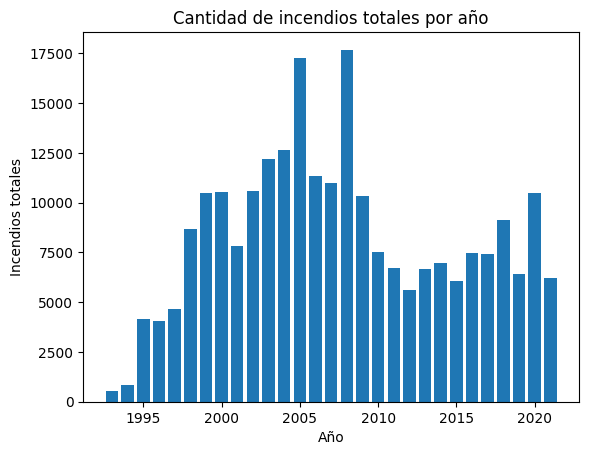

In [63]:
incendios_cordoba = raw_data[raw_data['provincia'] == 'Córdoba']
suma_cordoba = raw_data.groupby("anio")["total"].sum().reset_index()
plt.bar(suma_cordoba["anio"],suma_cordoba["total"])
plt.xlabel('Año')
plt.ylabel('Incendios totales')
plt.title('Cantidad de incendios totales por año')
plt.show()

# Santa Fe

In [68]:
incendios_santafe = raw_data[raw_data['provincia'] == 'Santa Fe']
suma_santafe = incendios_santafe.groupby("anio").agg({"intencional":"sum",
                                             "natural":"sum",
                                             "negligencia":"sum"}).reset_index()
suma_santafe

,anio,intencional,natural,negligencia
0,1993,0,0,0
1,1994,0,0,0
2,1995,2,0,151
3,1996,0,0,543
4,1998,74,2,223
5,1999,195,4,256
6,2001,250,63,197
7,2002,255,101,240
8,2003,359,148,201
9,2004,290,71,245


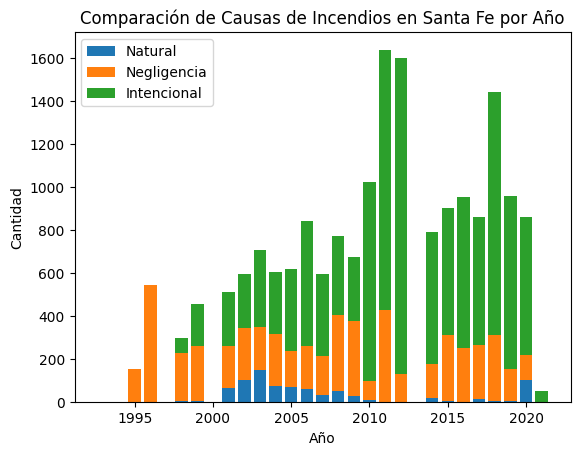

In [69]:
plt.bar(suma_santafe['anio'], suma_santafe['natural'], label='Natural')
plt.bar(suma_santafe['anio'], suma_santafe['negligencia'], bottom=suma_santafe['natural'], label='Negligencia')
plt.bar(suma_santafe['anio'], suma_santafe['intencional'], bottom=suma_santafe['natural'] + suma_santafe['negligencia'], label='Intencional')

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Comparación de Causas de Incendios en Santa Fe por Año')
plt.legend()
plt.show()

# Rio Negro

In [66]:
raw_data.iloc[552]

anio                2016
provincia      Río Negro
total                766
negligencia           55
intencional            5
natural                0
desconocida          706
Name: 552, dtype: object

In [67]:
incendios_rionegro = raw_data[raw_data['provincia'] == 'Río Negro']
incendios_rionegro


,anio,provincia,total,negligencia,intencional,natural,desconocida
14,1993,Río Negro,36,36,0,0,0
37,1994,Río Negro,258,251,7,0,0
60,1995,Río Negro,418,168,250,0,0
83,1996,Río Negro,361,73,11,27,250
105,1997,Río Negro,700,245,453,2,0
128,1998,Río Negro,1197,185,520,26,466
150,1999,Río Negro,902,518,118,8,258
174,2000,Río Negro,1143,741,144,24,234
198,2001,Río Negro,1836,542,161,222,911
221,2002,Río Negro,1952,510,97,63,1282


In [107]:
suma_rionegro = incendios_rionegro.agg({"intencional":"sum",
                                             "natural":"sum",
                                             "negligencia":"sum",
                                             "desconocida":"sum"})
suma_rionegro_df = suma_rionegro.to_frame(name="cantidad").reset_index().rename(columns={"index": "tipo"})
suma_rionegro_df

,tipo,cantidad
0,intencional,9969
1,natural,548
2,negligencia,6988
3,desconocida,15251


([<matplotlib.patches.Wedge at 0x2297900c0e0>,
 [Text(-0.8986536712746064, 0.634367069688104, 'intencional'),
  Text(-1.0157215784500215, -0.4222673028675046, 'natural'),
  Text(-0.4824526297081912, -0.9885542271861727, 'negligencia'),
  Text(1.0935804301702172, 0.11866694042033309, 'desconocida')],
 [Text(-0.4901747297861489, 0.34601840164805664, '30.4%'),
  Text(-0.5540299518818299, -0.23032761974591157, '1.7%'),
  Text(-0.2631559798408315, -0.5392113966470032, '21.3%'),
  Text(0.596498416456482, 0.06472742204745441, '46.6%')])

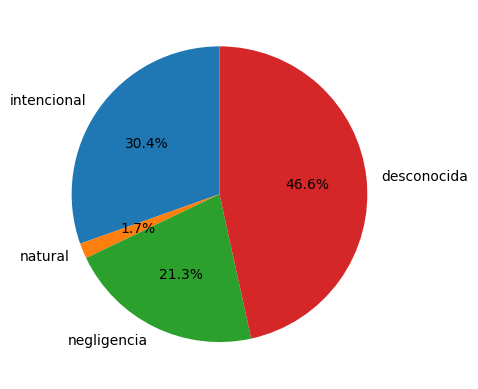

In [108]:
plt.pie(suma_rionegro_df['cantidad'], labels=suma_rionegro_df['tipo'], autopct='%1.1f%%', startangle=90)
